In [114]:
import PyKDL as kdl
import kdl_parser_py.urdf
import pickle
import torch
import sys, os
import cv2 as cv
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import transformations as tf

import numpy as np
np.set_printoptions(suppress=True)


In [179]:
from utils import robot_visualize as rbvis

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
# joint_states = [-0.07250058, -0.29814512, -1.0155243 ,  1.2973418 ]



In [3]:
(ok, tree)  = kdl_parser_py.urdf.treeFromFile("./hitbot_model.urdf")
print("ok: ", ok)
tree


NameError: name 'kdl_parser_py' is not defined

In [2]:
# chain = tree.getChain("body_link", "camera_link")
# chain = tree.getChain("body_link", "link4")

chain = tree.getChain("world", "camera_link")
# chain = tree.getChain("world", "link4")

fk_solver = kdl.ChainFkSolverPos_recursive(chain)


NameError: name 'tree' is not defined

In [183]:
joint_states = kdl.JntArray(chain.getNrOfJoints())  # replace with your actual joint states


In [184]:

joint_states

[           0           0           0           0]

[  -0.0967627     -0.1316    -1.29117         1.4]


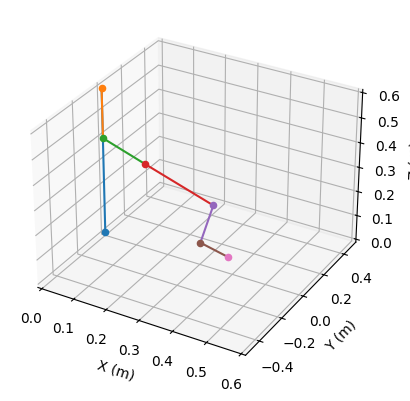

In [195]:
joint_states = [-0.0967627,  -0.13159958, -1.2911736,   1.4]
# joint_states = [-0.1, 0.0, 0.0, 0.0]

joint_states = rbvis.joint_states_to_jnt_array(joint_states)
print(joint_states)
link_poses = rbvis.get_poses(fk_solver, chain, joint_states)
rbvis.plot_robot(link_poses)

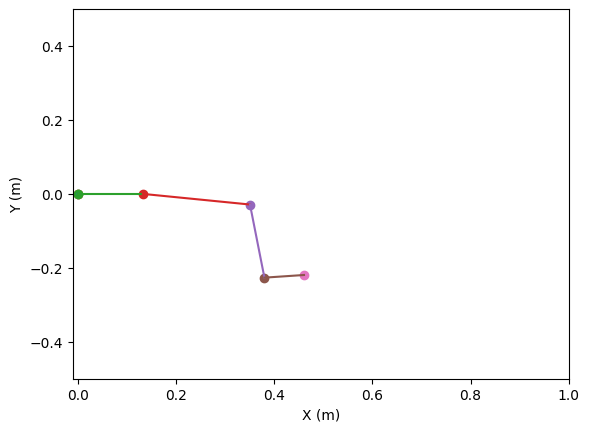

In [199]:
rbvis.plot_robot_2d_xy(link_poses)